# KERAS and TENSORFLOW


- **Tensorflow**: 

Libreria open-source per calcolo numerico. E' stata implementata dal team di Google AI e supporta operazioni di machine learning e deep learning (oltre a molte altre funzioni)
    
    
- **Keras**:

API per neural networks in python (Tensorflow, Theano,...). Perchè è così figo?
 
   - 1) Ha un'implementazione molto semplice e intuitiva, fa da dialogo tra te e tensorflow/theano
   - 2) La sintassi non cambia se tensorflow gira in gpu o cpu!
   - 3) Con il linguaggio di Keras è possibile definire dei modelli generali ed eseguirli SENZA CAMBIARE SINTASSI con tensorflow o theano (che hanno invece delle sintassi molto differenti) 

# <img style="text-align: left" src="Christianimg/keras-tensorflow-logo.jpg" width="40%" />

# 1. Prerequisiti:

In [2]:
import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import IPython
print('iPython:', IPython.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import tensorflow
print('tensorflow:', tensorflow.__version__)

import keras
print('keras:', keras.__version__) #qui dovrebbe dare una riga rossa con "tensorflow as backend"


numpy: 1.15.4
scipy: 1.1.0
matplotlib: 3.0.0
iPython: 7.1.1
scikit-learn: 0.20.0
tensorflow: 1.12.0
keras: 2.2.4


Using TensorFlow backend.


# 2. Artificial Neural Networks - Perceptrone

In machine learning, una rete neurale è un insieme di algoritmi volti a simulare il comportamento del cervello nella memorizzazione di patterns e nella successiva formulazione di predizioni. Ad esempio, cosa fa il cervello quando stiamo giocando a ping pong? Supponi ti stia arrivando la palla da colpire. Il cervello è capace di eseguire circa 3*10^15 operazioni al secondo. Ad ogni istante arbitrario il cervello immagazzina informazioni sulla pallina ad esempio con che velocità arriva, con che angolazione rispetto al campo, lo spin che l'avversario. Ad ogni istante t il cervello predice come possa essere il moto della palla al successivo istante. Si sta calibrando per dare la miglior risposta possibile nell'angolazione della paletta, nella sensibilità etc della risposta. Una volta che il cervello è capace di identificare il moto della palla allora la risposta del giocatore sarà sicuramente una buona risposta. Esempio di ciò èc he se ci tirano una palla velocemente il cervello non ha il tempo per effettuare questi calcoli, mentre se la palla viene lanciata lenta allora avremo molto più tempo per elaborare la risposta.

Le reti neurali artificiali cercano di emulare questo comportamento. Esse apprendono un insieme di dati, fanno predizioni e, in base al risultato, si riassestano nel modo più ottimale possibile fino a raggiungere una condizione finale.

**Ci sono essenzialmente due tipi di algoritmi di apprendimento:**

- Apprendimento supervisionato:

Si allena la rete dandole il risultato. Ad esempio si da alla rete una serie di vettori di lunghezza N dove in posizione N-esima si ha la variabile di "target" (quella che la rete deve imparare a predire, può essere un numero reale -> regressione oppure l'appartenenza a una classe -> classificazione). Quando la rete dovrà predire un risultato le verranno sottoposti dei vettori di lunghezza N-1 e la rete genererà l'entrata N-esima.

- Apprendimento non supervisionato:

La rete non conosce l'appartenenza di un oggetto a una classe ma cerca di identificare, nel dataset, dei pattern comuni a molti elementi così da poterli unire in vari gruppi (sono detti algoritmi di clustering. Ad esempio , un'applicazione può essere l'insegnare alla macchina a dividire autori di libri in base a come scrivono)

L'elemento fondamentale della rete neurale è il neurone (ma dai?). Tali neuroni vengono impilati e connessi per formare una rete. Il primo oggetto che andremo a vedere viene chiamato perceptrone

- ***Perceptrone***




# <img style="text-align: left" src="Christianimg/perceptron.png" width="50%" />

Come funziona matematicamente il perceptrone? Il ragionamento è simile a quello per una regressione lineare:
Viene definito un insieme di variabili che costituisce un dataset. Ogni oggetto del nostro dataset sarà quindi un vettore $x$ con entrate pari al numero di variabili $n$ che abbiamo scelto. Ti ricordi come si costruisce un modello lineare per regressione? 

$$\begin{equation}y(x,w) = f\big{(}\sum_{j=1}^{M} w_{j}\phi_{j}(x)\big{)}\end{equation}$$



E' una combinazione lineare di fissate funzioni di base (non lineari) $\phi_{j}$ ed $f$ è una funzione non lineare che, nel caso della regressione, è l'identità. 

**Il nostro obiettivo è di estendere questo modello rendendo le funzioni di base $\phi_{j}$ dipendenti da parametri e permettendo a questi parametri di adattarsi insieme ai coefficienti {$w_{j}$} nella fase di allenamento**

Come si fa? 'Semplice'. Le reti neurali usano delle funzioi di base definite dall'equazione precedente ovvero ogni funzione di base per la rete neurale è essa stessa una funzione non lineare di una combinazione lineare degli inputs dove i coefficienti nella combinazione lineare sono dei parametri adattativi (se prima la funzione di base era $\phi_{j}$, nelle reti neurali la funzione di base è $y(x,w)$!)

Questo ragionamento ci porta al modello più semplice: prima costruiamo M combinazioni lineari ($a_{j}$) delle N variabili di input:

$$\begin{equation}a_{j} = \sum_{i=1}^{N} w_{ji}^{(1)}x_{i}+w_{j0}^{(1)}\end{equation}$$ 

dove j = 1...M, nel caso ci siano più neuroni, e il parametro 1 ci indica che siamo nel primo livello della rete. I parametri $w_{ij}$ sono detti "pesi" mentre il parametro $w_{j0}$ è generalmente chiamato bias. Le quantità $a_{j}$ sono comunemente chiamate "attivazioni". Ognuna di esse è quindi trasformata da una funzione non lineare differenziabile chiamata "funzione d'attivazione" (h, nell'immagine viene chiamata "threshold unit"):


$$\begin{equation}z_{j} = h(a_{j})\end{equation}$$


Gli z sono quindi gli output del nostro perceptrone!  

# 3. Reti Neurali (Multi Layer Perceptron)

Come si passa da perceptrone a una rete neurale? Semplice, basta prendere una combinazione di neuroni (perceptroni) come definiti in precedenza!

- Primo Layer: prende come input N dati e ne restituisce come output tanti quante sono le attivazioni, M
$$\begin{equation}a_{j} \quad \rightarrow \quad a_{k} = \sum_{j=1}^{M}w_{kj}^{(2)}z_{j}+w_{k0}^{(2)}\end{equation}$$
dove ora l'indice (2) ci indica che siamo sul secondo livello! L'indice k ora assumerà valori da 1...K dove K è il numero di putput del secondo livello...e così via fino al livello di output.

# <img style="text-align: left" src="Christianimg/perceptron and MLP.png" width="50%" />

Alla fine di tutto otteniamo la funzione di overall dell'intero perceptrone a multilivelli:

$$\begin{equation}y_{k}(x,w) = f\Big{(} \sum_{j=1}^{M}w_{kj}^{(2)}h\Big{(}\sum_{i=1}^{N}w_{ji}^{(1)}x_{i}+w_{j0}^{(1)}\Big{)}+w_{k0}^{(2)}\Big{)}\end{equation}$$

Dove k=1...K è il numero di output della rete (Ad esempio il numero delle classi in cui vogliamo dividere degli oggetti, è uno nel caso di una regressione) e f è la funzione d'attivazione finale.

# 4. Funzioni d'attivazione

In questo piccolo capitolo illustriamo le più comuni funzioni d'attivazione che convertono le somme degli input per i pesi nell'output dei neuroni. In analogia un chip può essere visto network digitale, la quale funzione d'attivazione converte qualsiasi valore di input in un output 0 (OFF) oppure 1 (ON) -> (Heavyside theta). Ancora, supponi che un neurone cerebrale emetta un segnale direttamente proporzionale al segnale in ingresso, la funzione d'attivazione può essere modelizzata come $\phi = \mu v$. Tuttavia solo la non-linearità delle funzioni d'attivazione usate sui neuroni possono permettere ai computer di apprendere informazioni da un dataset. 

- Proprietà desiderabili di una funzione d'attivazione:
    - Non linearità: Quando la funzione d'attivazione è non lineare, un teorema (e la pratica) ci garantiscono che un neural network a 2 livelli può essere considerato come un'approssimatore universale di funzioni.
    - Range: quando il range della funzione d'attivazione è limitata, network basati su ottimizazione tramite gradienti sono più stabili.
    - Differenziabile: Ovviamente per permettere metodi di ottimizzazione tramite gradiente (occhio!! ReLU non ha questa caratteristica e ha dei problemi con tali ottimizzazioni a gradiente. Tuttavia è una delle funzioni d'attivazione più usate nell'ambito delle neural networks)
    - ... (molte altre cose!)
    
- Identity: f(x) = x

# <img style="text-align: left" src="Christianimg/linear.png" width="40%" />

- Binary step: $\begin{equation}f(x) = \begin{cases} 0 & \mbox{for } x < 0 \\ 1 & \mbox{for } x \geq 0 \end{cases} \end{equation}$

# <img style="text-align: left" src="Christianimg/step.png" width="40%" />

- Logistic: f(x) = $\sigma$(x) = $\frac{1}{1 + e^{-x}}$

# <img style="text-align: left" src="Christianimg/logistic.png" width="40%" />

- TanH: f(x) = tanh(x)

# <img style="text-align: left" src="Christianimg/tanh.png" width="40%" />

- ReLU: f(x) = $\begin{equation}f(x) = \begin{cases} 0 & \mbox{for } x < 0 \\ x & \mbox{for } x \geq 0 \end{cases} \end{equation}$

# <img style="text-align: left" src="Christianimg/relu.png" width="40%" />

Cosa succederebbe se le funzioni d'attivazione dei neuroni in un MLP fossero tutte lineari? Allora per ogni neural mnetworks ne potremmo trovare uno senza hidden units!!

In [3]:
from keras.activations import linear
from keras.activations import sigmoid
from keras.activations import relu
from keras.activations import tanh
from keras.activations import softmax
from keras.activations import exponential

# 5. Aggiornamento dei pesi

- Si usano generalmente ottimizzazioni a "gradient descent" per far apprendere i coefficienti dei pesi del modello

- In ogni epoch (passaggio su tutto il training set) aggiorniamo il vettore dei pesi $w$ secondo la seguente regola:

$ w = w+\Delta w \qquad $ Dove     $\qquad \Delta w = -\eta \nabla J(w)$

In altre parole abbiamo calcolato il gradiente basandoci sull'intero training set e aggiornato i pesi proponendo un passo nella posizione opposto del gradiente $\nabla J$. Per trovare i pesi ottimali del modello si ottimizza una funzione di costo (ad esempio mse) $J(w)$. Oltretutto abbiamo moltiplicato il gradiente di un fattore chiamato learning rate $\eta$ che va bilanciato per determinare la velocità ottimale di apprendimento (occhio al computational time!) per trovare il minimo della funzione di costo.

- Stocastic Gradient descent:

Nell'ottimizzazione a gradient descent, aggiorniamo i pesi simultaneamente dopo ogni epoch e definiamo la derivata parziale per ogni peso $w_{j}$ nel vettore pesi come segue:

$$\frac{\partial}{\partial w_{j}}J(w) = \sum_{i} (y^{(i)}-a^{(i)})x_{j}^{(i)}$$

Dove $y^{(i)}$ è la target class di un sample $x^{(i)}$ e $a^{(i)}$ è l'attivazione del neurone.
Nei feedforward neural networks viene utilizzato un approccio di massimizzazione della likelihood (a differenza che nei Network Bayesiani...non mi addentro nei dettagli anche perchè non li so e non ti servono). Massimizzare la likelihhod equivale minimizzare la funzione di costo nota come Mean Squared Error (MSE):

$$ J(w) = \frac{1}{2} \sum_{n=1}^{N} [y(x_{n},w)-t_{n}]^{2} $$

Dove y è l'output del network per un vettore $x_{n}$ e $t_{n}$ è il suo target value.

E' questo l'unico ottimizzatore? NO! Ne esistono di molto più avanzati:

In [4]:
from keras.optimizers import SGD #Stocastic gradient descent
from keras.optimizers import Adam
from keras.optimizers import Adadelta

# 6. Backpropagation

I pesi di ogni neuroni sono aggiornati da gradient descent, dove ogni errore di un singolo neurone è derivato rispetto al suo peso. L'ottimizzazione di un layer è fatta con rispetto al livello precedente in una tecnica nota come Backpropagation of the error ( non ci addentreremo nel dettaglio perchè non serve ). Ad immagini:


# <img style="text-align: left" src="Christianimg/bkwd_step_net.png" width="40%" />



# <img style="text-align: left" src="Christianimg/backprop.png" width="40%" />



# 7. Costruzione di un MLP

Costruiamo una classe per un multi-layer perceptron, alleniamo e fittiamo sul dataset iris che è detto "didattico" (ispirato ad un notebook di Valerio Maggio)

In [5]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    
    #inizializziamo l'oggetto perceptrone con i due attributi prima descritti
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
data = np.hstack((X, y[:, np.newaxis]))

labels = iris.target_names
features = iris.feature_names

df = pd.DataFrame(data, columns=iris.feature_names+['label'])
df.label = df.label.map({k:v for k,v in enumerate(labels)})
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


***plotting iris data la potenza di seaborn***

In [7]:
import seaborn as sns

irisRaw = load_iris() #importing iris dataset
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])
print("Classi di fiori: {}".format(iris['target'].unique()))
print("Prime 5 righe \n")
print(iris.head(n=5))
print("\nStatistiche del dataset\n")
print(iris.describe())
print("\nStruttura del dataset (righe,colonne)\n")
print(iris.shape)
iris.columns = ['Sepal length','Sepal width','Petal length','Petal Width','target']

Classi di fiori: [0. 1. 2.]
Prime 5 righe 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Statistiche del dataset

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600

/Users/boldrinicoder/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/boldrinicoder/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/boldrinicoder/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/boldrinicoder/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

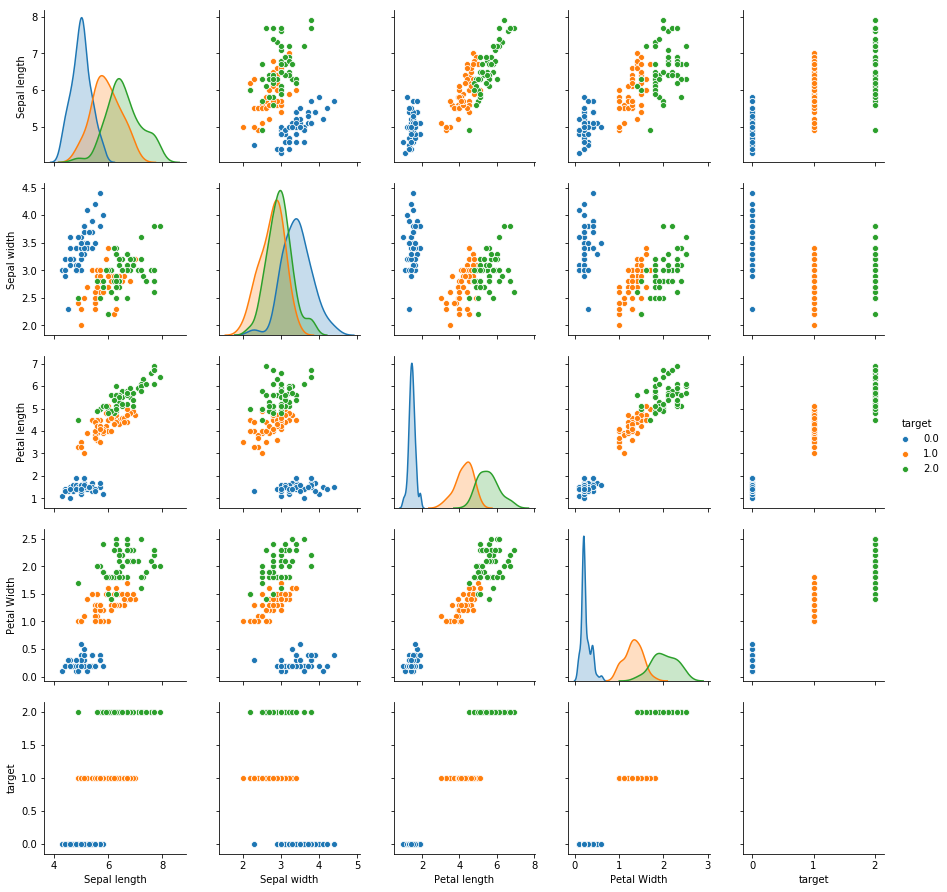

In [8]:
"""
La potenza di seaborn per visualizzare i dataset!!! Questa è una figata unica!
"""
sns.pairplot(iris, hue="target")

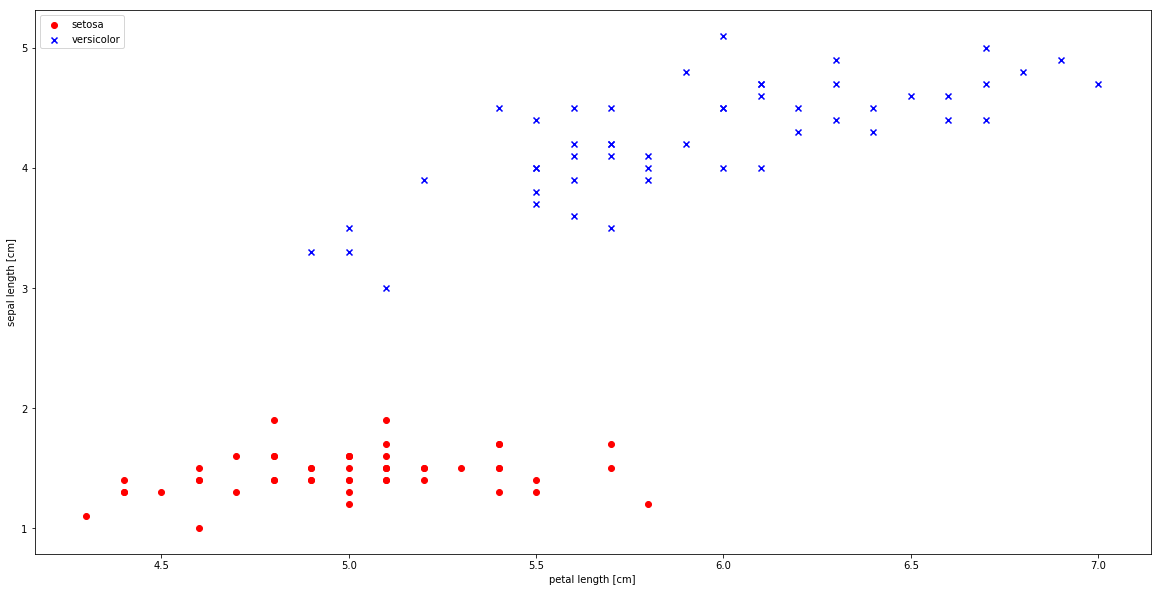

In [9]:
import numpy as np
import matplotlib.pyplot as plt



# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.figure(figsize=(20,10))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.show()

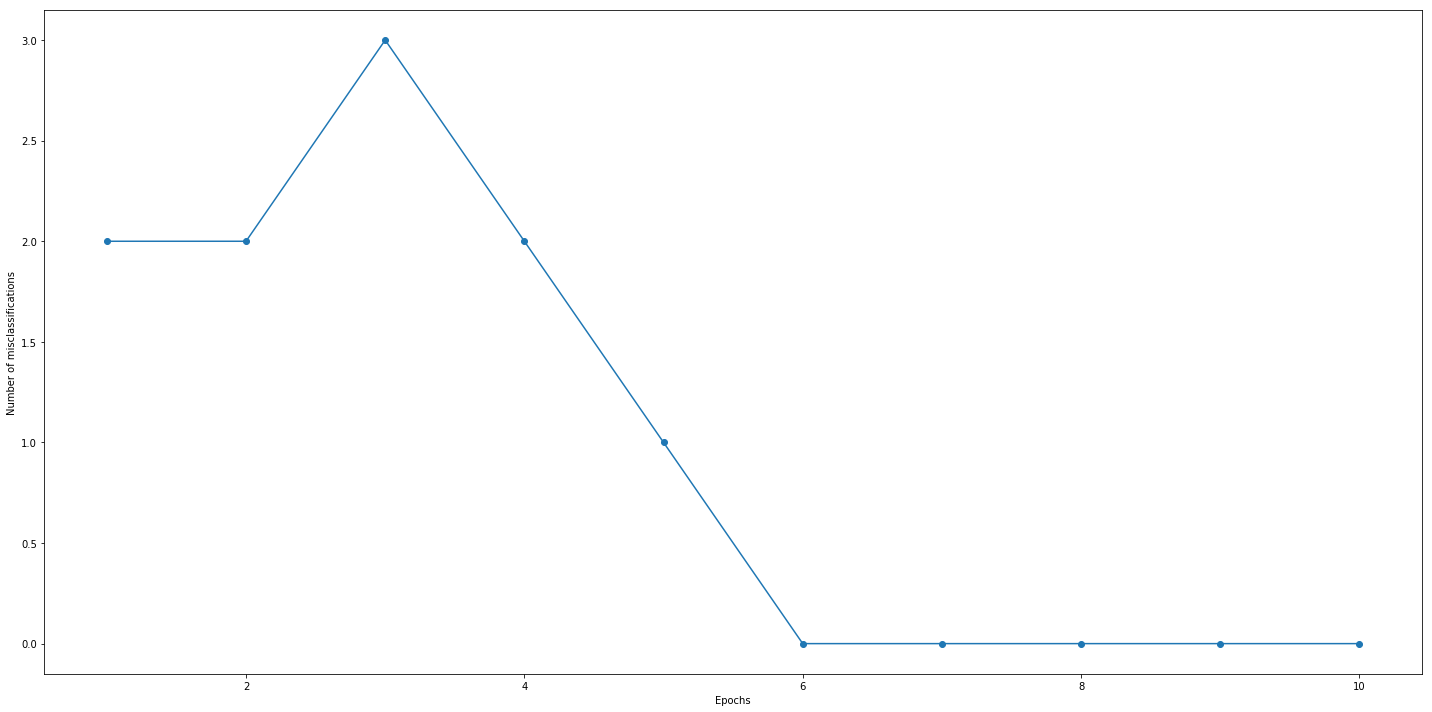

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.figure(figsize=(20,10))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

Una funzione per plottare le  decision regions

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


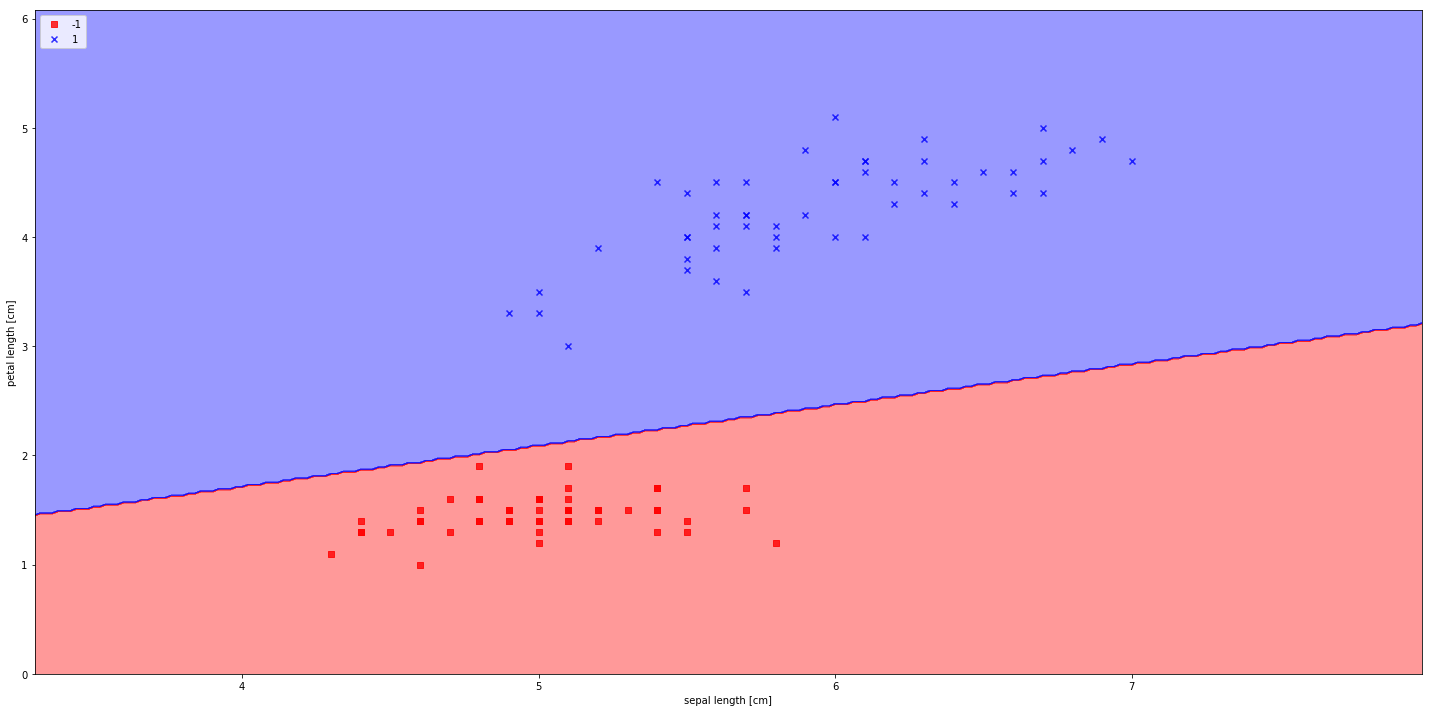

In [12]:
plt.figure(figsize=(20,10))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 7. Esempio regressione lineare Keras

Utilizziamo Keras come backend (il programma funzionerà sia con tensorflow che con theano) per un semplice problema di regressione lineare (trovare la retta che fitta meglio i nostri dati utilizziamo SGD come ottimizzatore. 

Dalla teoria, dato un dataset del tipo $[(x_{i},y_{i}]_{i=0}^{N}$ con $x_{i}$ ed $y_{i}$ reali, l'obiettivo di una regressione lineare è di trovare due scalari $w$ e $b$ tali che $y=w \cdot x +b$ fitta al meglio il dataset. In questo piccolo esercizio vediamo come ottenere i parametri utilizzando SGD e Mean squared error come loss function:

$$l = \frac{1}{N}\sum_{i=0}^{N} (w \cdot x_{i} + b-y_{i})^{2}$$

Partendo da valori CASUALI di $w$ e $b$, essi saranno aggiornati ad ogni epoch con le formule che abbiamo visto nella prefazione:

$$w_{t} = w_{t-1} - \eta \frac{\partial l}{\partial w} $$

$$ b_{t} = b_{t-1} - \eta \frac{\partial l}{\partial b}  $$

Con $\eta$ learing rate. 

***Nota bene:*** La regressione lineare non è altro che un semplice neurone con una funzione d'attivazione **Lineare**

Il dataset utilizzato è quello di ottogroup, importato tramite kaggle

In [13]:
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
from kaggle_data import load_data, preprocess_data, preprocess_labels

In [15]:
#im portiamo il dataset e le corrispettive labels
X_train, labels = load_data('/Users/boldrinicoder/Keras-tutorials/data/kaggle_ottogroup/train.csv', train=True)
#preproicess_data effettua una z-score normalization 
#per ogni variabile nel dataset
X_train, scaler = preprocess_data(X_train)
#valuta il numero di classi e trasforma ognuna in 0,1...N-1
Y_train, encoder = preprocess_labels(labels)

#carica test
X_test, ids = load_data('/Users/boldrinicoder/Keras-tutorials/data/kaggle_ottogroup/test.csv', train=False)

#preprocessing il test
X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')

9 classes
93 dims


In [16]:
feats = dims
training_steps = 25

In [17]:
# Placeholders and variables
x = K.placeholder()
target = K.placeholder()
w = K.variable(np.random.rand())
b = K.variable(np.random.rand())

***Nota bene:*** Qual'è la differenza tra un placeholder di keras e una variabile?

- Usa K.variable() per variabili adattative del modello come i pesi ('W') e i bias ('b').
- Usa K.placeholder() per dare in paso al modello i dati di train. Questo è un tensore! (tensorflow, ti dice niente?)

In [18]:
#definiamo la nostra funzione lineare
y = w * x + b

#definiamo la loss come MSE
loss = K.mean(K.square(y-target))

#definiamo il learning rate, l'update dei pesi con SGD
lr = K.constant(0.01)
grads = K.gradients(loss, [w,b])
updates = [(w, w-lr*grads[0]), (b, b-lr*grads[1])]

Tutto il modello definito può essere incapsulato in una 'function' che prende come input $x$ e $target$ , e ritorna la loss all'epoch di computazione, aggiorna i parametri secondo 'updates'

In [19]:
train = K.function(inputs=[x, target], outputs=[loss], updates=updates)

In [20]:
# Generiamo i dati casuali definiti come una retta
np_x = np.random.rand(1000)
np_target = 0.96*np_x + 0.24

In [21]:
# Training
loss_history = []
for epoch in range(200):
    current_loss = train([np_x, np_target])[0]
    loss_history.append(current_loss)
    if epoch % 20 == 0:
        print("Loss: %.03f, w, b: [%.02f, %.02f]" % (current_loss, K.eval(w), K.eval(b)))

Loss: 0.078, w, b: [0.00, 0.77]
Loss: 0.074, w, b: [0.02, 0.75]
Loss: 0.070, w, b: [0.05, 0.73]
Loss: 0.067, w, b: [0.07, 0.72]
Loss: 0.063, w, b: [0.09, 0.71]
Loss: 0.060, w, b: [0.11, 0.69]
Loss: 0.057, w, b: [0.14, 0.68]
Loss: 0.054, w, b: [0.16, 0.67]
Loss: 0.051, w, b: [0.18, 0.66]
Loss: 0.049, w, b: [0.20, 0.65]


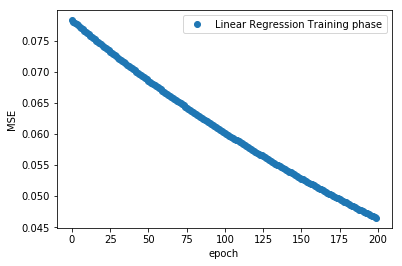

In [22]:
#plottiamo l'history
plt.plot(range(len(loss_history)), loss_history, 'o', label='Linear Regression Training phase')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 8. La potenza e semplicità di keras per Deep Learning- Iris

In [23]:
from keras import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid, tanh, softmax
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris
import numpy as np

In [24]:
iris = load_iris()
X = iris.data
y = iris.target

"""
abbiamo bisogno di un encoder ovvero il target sarà un vettore del tipo y = [000111222...] mentre vogliamo
avere un array del tipo y = [[1,0,0], [1,0,0], [0,1,0]..] per predirre in 3 classi!
"""
enc = OneHotEncoder(categories ='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

In [25]:
"""
Definiamo model come un oggetto sequential. Questo vuol dire che avremo una stack di layers!
Il sequential è l'unità più importante del API Keras. Contiene i metodi predict, evaluate, fit etc
"""

model = Sequential()
model.add(Dense(30, input_shape =(X.shape[1],), activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X,Y, epochs=30, verbose = 1)

Epoch 1/30
150/150 [==============================] - 0s 1ms/step - loss: 1.3983 - acc: 0.2000
Epoch 2/30
150/150 [==============================] - 0s 46us/step - loss: 1.2621 - acc: 0.3267
Epoch 3/30
150/150 [==============================] - 0s 48us/step - loss: 1.1419 - acc: 0.3333
Epoch 4/30
150/150 [==============================] - 0s 67us/step - loss: 1.0215 - acc: 0.3467
Epoch 5/30
150/150 [==============================] - 0s 54us/step - loss: 0.9526 - acc: 0.5933
Epoch 6/30
150/150 [==============================] - 0s 61us/step - loss: 0.9236 - acc: 0.6133
Epoch 7/30
150/150 [==============================] - 0s 42us/step - loss: 0.9001 - acc: 0.6667
Epoch 8/30
150/150 [==============================] - 0s 44us/step - loss: 0.8733 - acc: 0.6667
Epoch 9/30
150/150 [==============================] - 0s 50us/step - loss: 0.8416 - acc: 0.6667
Epoch 10/30
150/150 [==============================] - 0s 38us/step - loss: 0.8139 - acc: 0.6667
Epoch 11/30
150/150 [===================

In poche righe abbiamo creato, compilato un multi layer perceptron con ottimizzatore Adam e fitatto in base al dataset iris con un accuracy del 98% circa!

# 9. Loss, validation loss, metrics

Quando abbiamo compilato il modello in precedenza abbiamo usato:

```python
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

dove abbiamo impostato l'ottimizzatore 'Adam' (più potente in genere di SGD, vai a vedere nelle sheets di Keras cosa fa se ti interesssa), una loss "categorical_crossentropy e una metrica di valutazione come l'accuracy. 
La loss non è nient'altro che la funzione di costo che vogliamo minimizzare (come abbiamo usato per la regressione lineare mse). Elenchiamone un po':

- ***Loss***

- Regressione:

    - MSE (Mean squared error): $$ J(w) = \frac{1}{N} \sum_{n=1}^{N} [y(x_{n},w)-t_{n}]^{2} $$
    
    - MAE (Mean absolute error): $$ J(w) = \frac{1}{N} \sum_{n=1}^{N} |y(x_{n},w)-t_{n}| $$
    
    - logcosh: $$ J(w) = \frac{1}{N} \sum_{n=1}^{N} |logcosh(x_{n},w)-t_{n}| $$
    
    # <img style="text-align: left" src="Christianimg/losses.png" width="80%" />
    
Cosa cambia da una all'altra? La funzione 'loss' o di costo mappa gli eventi del nostro dataset in numeri reali, i 'costi'. Per ottimizzare il modello vogliamo minimizzare la somma di tali costi ovvero vogliamo minimizzare la distanza tra le predizioni e il valore vero. Come vedi dai grafici cambia la pendenza delle funzioni simmetricamente rispetto a 0, questo incide sul peso dato ad un evento "outlier" ovvero un evento che è 'distante' o particolarmente differente dagli altri nel dataset. La selezione delle loss è data da quanto devono pesare gli outliers sul modello!

- Classificazione:
    - categorical_crossentropy: per classificazioni con più di due classi
    - binary_crossentropy: per classificazioni binarie
    

- ***Validation loss***

E' buona norma allenare la rete considerando uno splitting del dataset in 3 parti: Train, test e validation. Il validation dataset è un subset che utlizziamo per il tuning degli hyperparameters  della rete (numero diu neuroni, numero di hydden layers). Dopo ogni epoch keras valuta il costo della rete su un insieme di dati diversi dal training ovvero il validation set. Cambieremo gli hyperparameters in base a come la rete performa sul validation set (per prevenire overfitting). La rete allenata può quindi essere usata per predire su dati mai visti ovvero il test dataset. Come si splitta un dataset in train e test?

```python
    from sklearn.model_selection import train_test_split
    X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2)

```

- ***Metrics***

```python
from keras import metrics
```

Una metrica non è nient'altro che una funzione atta a giudicare la performance del nostro modello, sono divise in metriche per regressione e classificazione. Una metrica è molto simile (se non uguale) alla loss function ma viene esclusivamente valutata sulle predizioni del test. Elenchiamone alcune velocemente:

 - Regression:
     - MSE
     - MAE
     
- Classification:
    - binary_accuracy
    - categorical_accuracy
    - AUC score
    
Possiamo creare anche delle metriche a nostro piacimento, dipende dal problema in analisi. Esempio, il codice seguente restituisce la deviazione standart delle predizioni della rete

```python
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)
```

# 10. Overfitting

L'overfitting è la piaga del machine learning. In pratica se il modello non è ottimizzato, la rete imparerà a memoria il dataset. Se il dataset è banale non si hanno grandi problemi, in quanto i dati di test saranno del tutto simili a quelli di train (bisogna vedere a che livello di apprendimento è arrivata la rete). Nella stra grande maggioranza dei casi tuttavia l'overfitting è una cosa da evitare e lo vedremo dal comportamento della rete sul validation set! Mentre la rete riuscirà a minimizzare la loss function, la validation loss function inizierà a salire in quanto ple predizioni faranno schifo. Un piccolo esempio su una banale approssimazione di funzione

<img style="text-align: left" src="Christianimg/overfitting.png" width="80%" />

Come si vede la rete fitta perfettamente i nostri dati! Ma perde di qualsiasi generalità e si adatta totalmente ai dati di train. 

Come possiamo quindi evitare l'overfitting?

- **Regularization**

Sono dei metodi che ci permettono di prevenire l'overfitting. I più importanti sono:

- Early_stop: Ad un certo punto del training, inevitabilmente, una minimizzazione della loss implica un'innalzamento dell'errore nella generalizzazione. L'early stop permette di stoppare il processo di training quando segnali di overfitting sono osservati. Comunemente io uso un early stop sulla validation loss ovvero il training si ferma se dopo $n$ epoch la val_loss non scende di un certo valore $min_deltaeta$. Keras fortunatamente supporta dei callbacks ovvero un insieme di funzioni che ci danno delle informazioni sul training durante le varie epoch.

```python
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=1, mode='auto')
```
Questo ci dice che se se la validation non diminuisce nell'arco di 5 epochs almeno di 0.01 il training sarà stoppato. Possiamo includere questa informazione nel metodo .fit di un modello sequential.

```python

model.fit(X_train,Y_train, epochs=30, verbose = 1, validation_data=(X_validation,Y_validation), callbacks = [early_stop])
```


- Dropout: Frazione casuale di neuroni che non vengono utilizzati durante la fase di training. Numero compreso tra zero e uno.

```python

from keras.layers import Dropout
```

Inseriamo questa informazione dopo ogni layer dove vogliamo droppare neuroni ad esempio:

```python
model = Sequential()
model.add(Dense(30, input_shape =(X.shape[1],), activation = 'tanh')`
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax')) 
```

Così il 20% dei neuroni di ciascun livello non sarà utilizzato durante il training (la selezione è fatta a caso, altrimenti basterebbe ridefinire un Layer con meno neuroni!)


***Esempio: plottiamo loss e validation loss per l'iris dataset***

In [26]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [27]:
#Definiamo semplici funzioni di plot

def acc_plotter(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['acc'], label = "train_accuracy")
    plt.plot(history.history['val_acc'], label="val_accuracy")
    plt.legend(['acc_train', 'acc_test'], loc='lower right')
    plt.xlabel('epochs')
    plt.ylabel('acc')

def loss_plotter(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label = "train_loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.legend(['loss_train', 'loss_test'], loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')

In [28]:
iris = load_iris()
X = iris.data
y = iris.target

enc = OneHotEncoder(categories ='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

#splittiamo il dataset per ottenere il validation e il train set
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = 0.3)

In [29]:
#il modello è identico al precedente!

model = Sequential()
model.add(Dense(30, input_shape =(X.shape[1],), activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='auto')

"""
ma questa volta diamogli 1000 epochs e vediamo se l'early_stop si attiva prima fermando il training
"""
history = model.fit(X_train,Y_train, epochs=1000, verbose = 0, validation_data=(X_validation,Y_validation), callbacks = [early_stop])

Epoch 00131: early stopping


In [30]:
#cosa contiene l'oggetto history?

print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


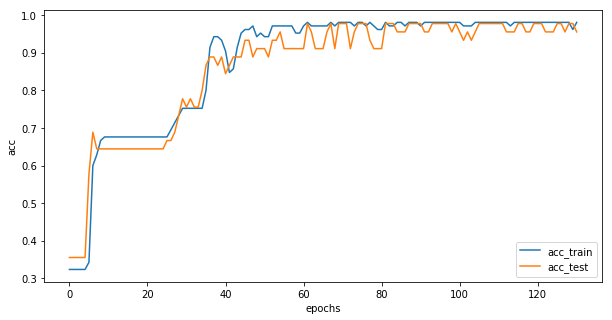

In [31]:
acc_plotter(history)

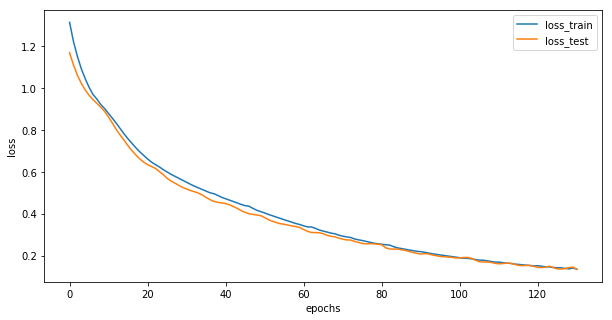

In [32]:
loss_plotter(history)

Come si può vedere l'early stop si è attivato! la loss e la validation loss scendono entrambe durante le epochs ma verso le ultime 10 abbiamo un plateau, che vuol dire che abbiamo raggiungo un minimo (infatti l'accuracy è circa 100% sul validation)! Se l'overfitting fosse più evidente otterremmo i seguenti plot:

<img style="text-align: left" src="Christianimg/overfit2.png" width="80%" />

Vediamo che nel punto in cui la validation_loss inizia la risalita l'accuracy sul validation set inizia a calare drasticamente!

Puoi provare ad aumentare il numero di neuroni per overfittare il dataset iris.

# 11. Data visualization - Regression

Abbiamo visto come plottare i grafici della loss e della validation loss per controllare il training di una rete. Tuttavia non abbiamo ancora visto come visualizzare il risultato delle predizioni di una rete. Dovremo distinguere tra classificazione e regressione:

- Regressione:

Per i risultati della regressione utilizziamo quelli che si chiamano scatter plot. Abbiamo due array, y_pred contenente le predizioni della rete e y_true contenente il valore vero del target di predizione per un dato vettore di ingresso x. Se plottiamo questi valori su un grafico dove sulle ascisse poniamo y_pred e sulle ordinate y_true allora ci aspettiamo che una rete neurale ideale abbiamo un plot con punti disposti sulla diagonale ovvero quando y_true=y_pred. In questo caso possiamo effettuare una regressione lineare per vedere di quanto dista la miglior retta interpolata con i nostri dati dalla bisettrice ottenendo uno score di accuracy del nostro modello. Vediamo come fare:

Importiamo un dataset base per regressione. normalizziamo in z score sia l'array X che l'array y ovvero: $z = \frac{X-\mu}{\sigma}$ dove $\mu$ è la media e $\sigma$ è la deviazione standard. Questo aiuta nell'allenamento della rete. Per tornare ai dati originari basta invertire la formula dopo le predizioni della rete.

In [33]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


"""
Definiamo una semplice funzione di normalizzazione per array 1d infatti StandardScaler non funziona per essi
"""

def Normalizer(y):
    mean = np.mean(y)
    std = np.std(y)
    z = []
    for i in y:
        z.append((i-mean)/std)
    z = np.array(z)
    return z

#importiamo 150 vettori dal dataset
X, y = make_regression(n_samples=150, n_features=2, noise=0.1, random_state=1)

#definiamo gli ultimi 50 come holdout per testare la rete
X_test, y_test = X[100:150], y[100:150]
#definiamo i primi 100 per train e validation
X, y = X[:100], y[:100]
scaler = StandardScaler(copy = False, with_mean = True, with_std = True)
scaler.fit(X)
scaler.fit_transform(X)
scaler.fit(X_test)
scaler.fit_transform(X_test)
y = Normalizer(y)
y_test = Normalizer(y_test)

print("X shape, Y shape: {}, {}".format(X.shape, y.shape))
print("X_test shape, Y_test shape: {}, {}".format(X_test.shape, y_test.shape))

X shape, Y shape: (100, 2), (100,)
X_test shape, Y_test shape: (50, 2), (50,)


In [34]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y, test_size = 0.3)
print("X_train shape {}, Y_train shape {}".format(X_train.shape, Y_train.shape))
print("X_validation shape {}, Y_validation shape {}".format(X_validation.shape, Y_validation.shape))

X_train shape (70, 2), Y_train shape (70,)
X_validation shape (30, 2), Y_validation shape (30,)


In [35]:
model = Sequential()
model.add(Dense(10, input_shape =(X.shape[1],), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

#occhio che in regressione non abbiamo funzioni di attivazione sull'output!! sarà proprio la somma di 
#tutti i contributi dei neuroni

model.add(Dense(1) )

#compiliamo con adam ottimizzatore e come loss mean squared erro, per le regressioni
model.compile(optimizer='adam',
              loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='auto')

history = model.fit(X_train,Y_train, epochs=1000, verbose = 0, validation_data=(X_validation,Y_validation), callbacks = [early_stop])

Epoch 00103: early stopping


In [36]:
#cosa contiene l'oggetto history?

print(history.history.keys())

dict_keys(['val_loss', 'loss'])


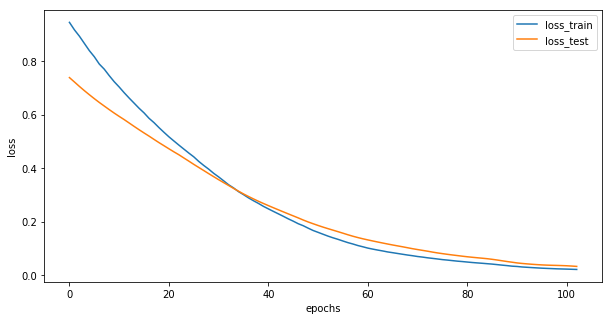

In [37]:
loss_plotter(history)

Ora è giunto il momento di fare delle predizioni! e di vedere quanto i risultatiu della rete distano dai dati reali. Come estimatore per l'efficienza della rete nella regressione utilizziamo il mnean squared error

In [38]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
print("Mean squared error: {}".format(mean_squared_error(y_test, pred)))

Mean squared error: 0.02277631483327329


Sembrerebbe molto basso no? ma non si capisce bene da un numero, dipende dal numero di eventi considerati, dalla loro media e deviazione standard. Il metodo più efficiente è una combinazione di un estimatore con un metodo visivo, lo scatter plot

In [39]:
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
import scipy.odr as odr 

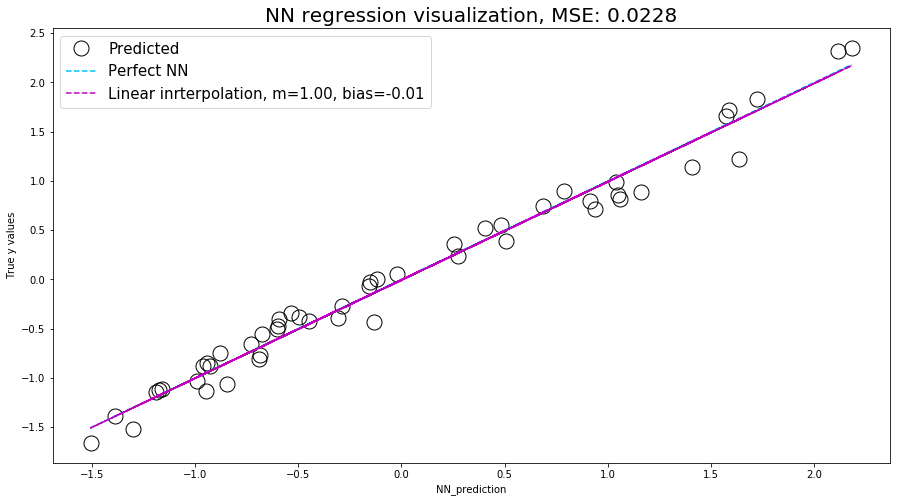

In [40]:
def f(B, x):
    '''Linear function y = m*x + b'''
    return B[0]*x + B[1]

def scatter_plotter(y, pred):
    
    #definiamo la funzione per l'interpolazione dei punti grazie a scipy ODR. sarà una retta
    sxx = np.std(pred)
    syy = np.std(y)
    linear = odr.Model(f)
    mydata = odr.RealData(np.concatenate(pred), y, sx=sxx, sy=syy)
    myodr = odr.ODR(mydata, linear, beta0=[1, 0.5])
    myoutput = myodr.run()
    
    
    #definiamo il tipo di marker per i nostri puntii (è solo estetica)
    mark = dict(marker= 'o',
            color = "black", 
            fillstyle="none",
            markersize=15, 
            linewidth = 0)
    
    #plotting
    fig = plt.figure(figsize=(15,8))
    plt.plot(pred,y, **mark, label = "Predicted")
    top = max(pred)
    bottom = min(pred)
    
    #plottiamo la bisettrice ovvero dove sarebbero disposti i punti de la rete fosse perfetta
    plt.plot([bottom,top],[bottom,top], "r--", color = "deepskyblue", label = "Perfect NN")
    
    #plottiamo l'interpolazione
    plt.plot(pred,f(myoutput.beta, pred), "r--", color = "m", label = "Linear inrterpolation, m=%.2f, bias=%.2f" %( myoutput.beta[0], myoutput.beta[1]))
    
    plt.xlabel('NN_prediction') 
    plt.ylabel('True y values') 
    plt.title("NN regression visualization, MSE: %.4f" % mean_squared_error(y_test, pred), fontsize=20)
    plt.legend(loc="best", prop={'size': 15})
    
scatter_plotter(y_test, pred)

# 12. Data visualization - Classificazione

Ultimo elemento, plottare il risultato di una classificazione con una rete. Questo viene fatto grazie a due strumenti, la ROC curve e la confusion matrix. Le metriche utilizzate solitamente sono l'accuracy oppure l'AUC score ovver l'area sottesa dalla ROC curve. Analizziamo come si fa sul dataset iris in classificazione:

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

In [71]:
iris = load_iris()
X = iris.data
y = iris.target
enc = OneHotEncoder(categories ='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5)

In [75]:
#Definiamo come plottare la confusion matrix

def plot_confusion_matrix(cm, names, title, cmap=plt.cm.Blues):
    #soglia per contrasto colore
    thresh = cm.max() / 1.5 
    #plotto per ogni cella della matrice il valore corrispondente
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black", fontsize=25)
    #plotto il resto
    #mp.rc('figure', figsize=(20,20), dpi=140)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, fontsize = 20)
    plt.yticks(tick_marks, names, fontsize = 20)
    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    plt.tight_layout()
    
def Confusion_matrix(y, pred):
    plt.figure(figsize=(10,10))
    cm = confusion_matrix(y, pred)
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized,[0,1,2], title='Normalized confusion matrix')
    plt.draw()

In [76]:
model = Sequential()
model.add(Dense(30, input_shape =(X.shape[1],), activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X,Y, epochs=30, verbose = 1)

Epoch 1/30
150/150 [==============================] - 0s 3ms/step - loss: 1.3259 - acc: 0.3333
Epoch 2/30
150/150 [==============================] - 0s 71us/step - loss: 1.2264 - acc: 0.3333
Epoch 3/30
150/150 [==============================] - 0s 79us/step - loss: 1.1551 - acc: 0.4067
Epoch 4/30
150/150 [==============================] - 0s 56us/step - loss: 1.0960 - acc: 0.3333
Epoch 5/30
150/150 [==============================] - 0s 51us/step - loss: 1.0393 - acc: 0.3333
Epoch 6/30
150/150 [==============================] - 0s 50us/step - loss: 0.9877 - acc: 0.4867
Epoch 7/30
150/150 [==============================] - 0s 47us/step - loss: 0.9405 - acc: 0.6933
Epoch 8/30
150/150 [==============================] - 0s 46us/step - loss: 0.8986 - acc: 0.7333
Epoch 9/30
150/150 [==============================] - 0s 49us/step - loss: 0.8584 - acc: 0.7533
Epoch 10/30
150/150 [==============================] - 0s 51us/step - loss: 0.8201 - acc: 0.7533
Epoch 11/30
150/150 [===================

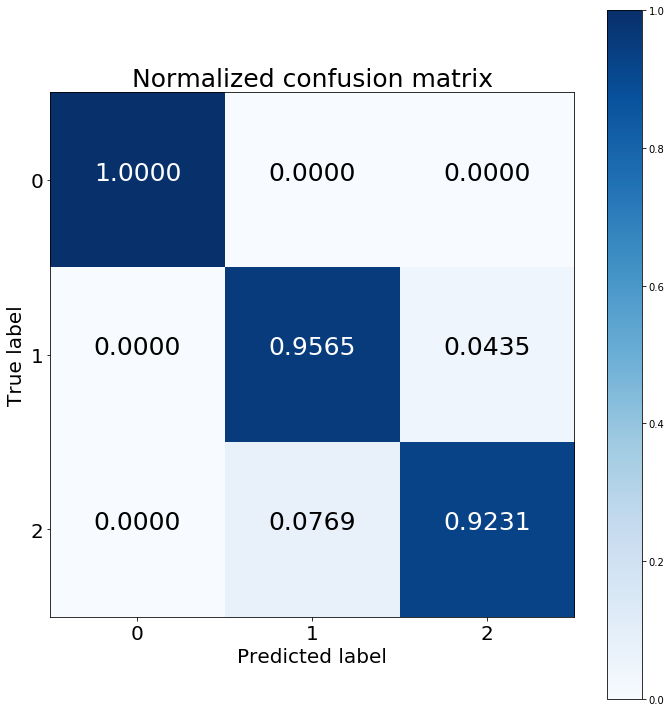

In [77]:
pred = model.predict(X_test)

#abbiamo bisognmo di togliere l'encoding per computare la confusion matrix e tormare alle classi
confusion_matrix( Y_test.argmax(axis=1), pred.argmax(axis=1))
Confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

Come vedi sulla diagonale ci sono le caselle più importanti ovvero dove true_lebel=predicted_label, ti da la percentuale di eventi appartenenti alle varie classi 0,1,2 predetti correttamente dalla rete. 

Abbiamo un altro metodo per visualizzare questo comportamento, la ***ROC curve***

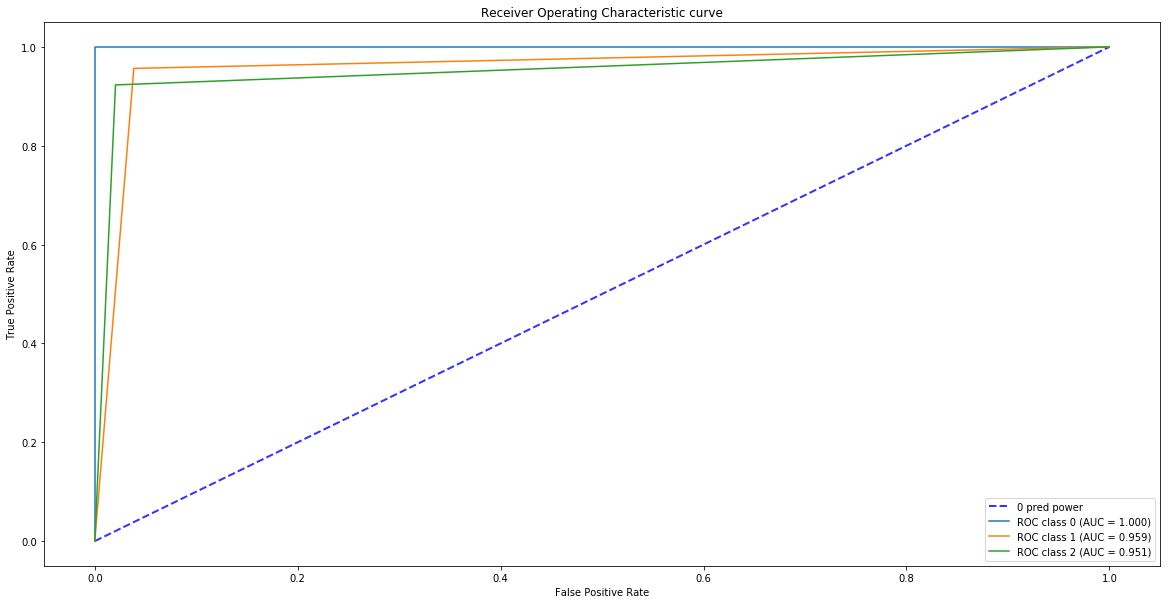

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def Plotting_Roc_classes(n_classes,Y_test,pred):
    i = 0
    plt.figure(figsize=(20,10))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b',label='0 pred power', alpha=.8)
    while i < n_classes:
        c = Y_test.argmax(axis=1)
        c = (c==i).astype(int)
        b = pred.argmax(axis=1)
        b = (b==i).astype(int)
        fp , tp, th = roc_curve(c, b)
        roc = roc_auc_score(c, b)
        plt.plot(fp, tp, label='ROC class %1.f (AUC = %0.3f)' %(i,roc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic curve')
        plt.legend(loc="lower right")
        i+=1
        

Plotting_Roc_classes(pred.shape[1], Y_test,pred)

# 11. Keras Lambda Layers

```python
keras.layers.Lambda(function, output_shape=None, mask=None, arguments=None)
```

Keras ti da la possibilità di definire dei layers personalizzabili attraverso sintassi abbastanza semplici.
Esempio creiamo un dummy layer che porta $x \rightarrow x^{2}$

```python
model.add(Lambda(lambda x: x ** 2))
```

Questo è molto utile quando l'operazione che il layer deve svolgere è banale. Basta definire una funzione e l'output di tale funzione:

```python
def funzione(x):
    
    return risultato

def funzione_output_shape(input_shape):
    
    return tuple(...)

model.add(Lambda(funzione,
                 output_shape=funzione_output_shape))

```
